# Empirical Analysis

## Importation

In [53]:
import time
import tabulate
import numpy as np
import alive_progress as ap
import seaborn as sns
import matplotlib.pyplot as plt
from dictionary.word_frequency import WordFrequency
from dictionary.list_dictionary import ListDictionary
from dictionary.hashtable_dictionary import HashTableDictionary
from dictionary.ternarysearchtree_dictionary import TernarySearchTreeDictionary

In [54]:
def read_file():
    # Read in sampleData200k.txt
    ret_dict = {}
    with open('sampleData200k.txt', 'r') as f:
        sample_data = [line.strip() for line in f.readlines()]
        sample_data = [WordFrequency(word=line.split()[0], frequency=int(line.split()[1])) for line in sample_data]

        for i in range(16):
            prev_size = 200000 // 2 ** (16 - (i - 1))
            size = 200000 // 2 ** (16 - i)
            ret_dict[str(size + prev_size)] = sample_data[:size + prev_size]
    return ret_dict

In [55]:
dictionaries = read_file()

## Use Case Scenarios

1. **Growing dictionary**: The dictionary is growing in size, and you are to evaluate and compare the running times of the Add operations across different data structures.

2. **Shrinking dictionary**: The dictionary is shrinking in size, and you are to evaluate and compare the running times of the Delete operations across different data structures.

1. **Static dictionary**: You are to evaluate and compare the running times of the Search and Auto-completion operations on fixed size dictionaries.

### Growing Dictionary

Dictionaries will be built of various sizes over the three data structures. The average computational time will be recorded to be analysed later.

In [56]:
# noinspection PyPep8Naming
def growing_analysis(dicts: dict, NO_RUNS: int = 10):
    # Build dictionaries.
    # noinspection PyShadowingNames
    dict_sizes, list_times, hash_times, tst_times = list(), list(), list(), list()
    list_dictionary, hash_dict, tst_dict = ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()
    # Calculate time taken to build dictionaries.
    for run_no in range(NO_RUNS):
        with ap.alive_bar(len(dicts.keys())) as bar:
            for index, size in enumerate(dicts.keys()):
                start_time = time.perf_counter_ns()
                list_dictionary.build_dictionary(dicts[size])
                list_times.append(list()) if run_no == 0 else None
                list_times[index].append(time.perf_counter_ns() - start_time)

                start_time = time.perf_counter_ns()
                hash_dict.build_dictionary(dicts[size])
                hash_times.append(list()) if run_no == 0 else None
                hash_times[index].append(time.perf_counter_ns() - start_time)

                start_time = time.perf_counter_ns()
                tst_dict.build_dictionary(dicts[size])
                tst_times.append(list()) if run_no == 0 else None
                tst_times[index].append(time.perf_counter_ns() - start_time)

                dict_sizes.append(size) if run_no == 0 else None
                bar()
    return dict_sizes, list_times, hash_times, tst_times

In [57]:
dict_sizes_add, list_times_add, hash_times_add, tst_times_add = growing_analysis(dictionaries, NO_RUNS=3)

|████████████████████████████████████████| 16/16 [100%] in 13.8s (1.16/s) 
|████████████████████████████████████████| 16/16 [100%] in 7.4s (2.17/s) 
|████████████████████████████████████████| 16/16 [100%] in 7.5s (2.15/s) 


In [58]:
def find_average(l: list):
    return [sum(times) / len(times) for times in l]

In [59]:
list_avg_add = find_average(list_times_add)
hash_avg_add = find_average(hash_times_add)
tst_avg_add = find_average(tst_times_add)

In [60]:
# noinspection PyShadowingNames
def print_table(dict_sizes: list, list_avg: list, hash_avg: list, tst_avg: list):
    print(tabulate.tabulate(np.c_[dict_sizes, list_avg, hash_avg, tst_avg],
                            headers=['Dictionary Size', 'List', 'Hash Table', 'TST'], tablefmt='fancy_grid'))

#### Average Building Computational Time

##### Table

In [61]:
print_table(dict_sizes_add, list_avg_add, hash_avg_add, tst_avg_add)

╒═══════════════════╤══════════════════╤══════════════════╤══════════════════╕
│   Dictionary Size │             List │       Hash Table │              TST │
╞═══════════════════╪══════════════════╪══════════════════╪══════════════════╡
│                 4 │   9833.33        │  13500           │ 122600           │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┤
│                 9 │   6766.67        │  16000           │ 205300           │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┤
│                18 │  10000           │  27633.3         │ 436400           │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┤
│                36 │  17600           │  54066.7         │ 898200           │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┤
│                72 │  35400           │ 101100           │      1.73703e+06 │
├───────────────────┼──────────────────┼────────────

##### Graph

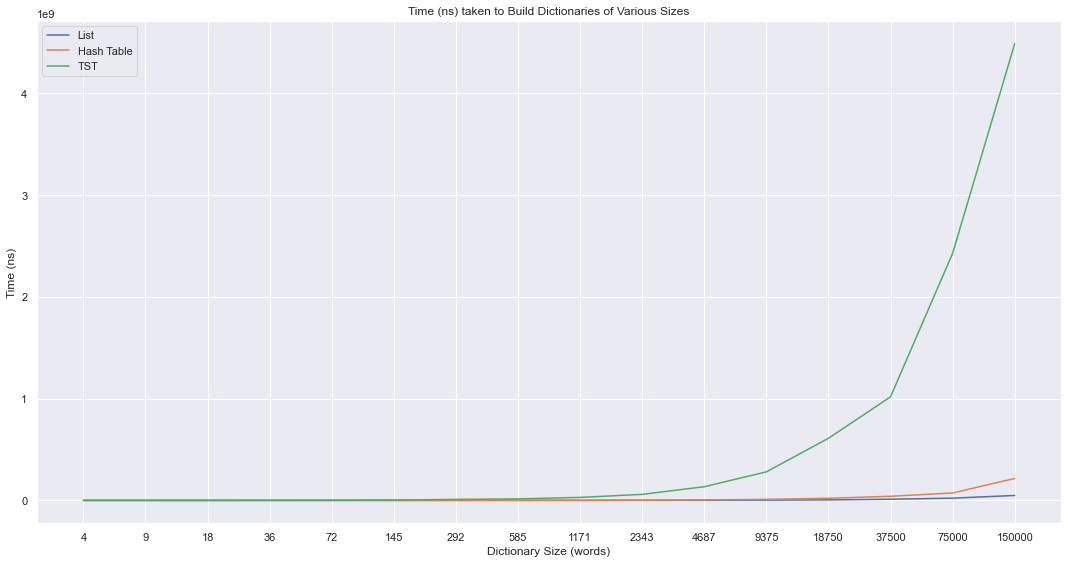

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", rc={'figure.figsize':(15,8)})
plt.plot(dict_sizes_add, list_avg_add, label='List')
plt.plot(dict_sizes_add, hash_avg_add, label='Hash Table')
plt.plot(dict_sizes_add, tst_avg_add, label='TST')
plt.title('Time (ns) taken to Build Dictionaries of Various Sizes')
plt.xlabel('Dictionary Size (words)')
plt.ylabel('Time (ns)')
plt.legend()
plt.tight_layout()
plt.show()

### Shrinking Dictionary

A large dictionary will be shrunk to various sizes over the three data structures. The average computational time will be recorded to be analysed later.

In [32]:
# noinspection PyPep8Naming
def shrinking_analysis(dicts: dict, NO_RUNS: int = 10):
    # Build dictionaries.
    # noinspection PyShadowingNames
    dict_sizes, list_times, hash_times, tst_times = list(), list(), list(), list()
    list_dict, hash_dict, tst_dict = ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()
    # Calculate time taken to build dictionaries.
    for run_no in range(NO_RUNS):
        max_size = str(max(map(lambda x: int(x), dicts.keys())))

        for index, size in enumerate(dicts.keys()):
            list_dict.build_dictionary(dicts[max_size])
            hash_dict.build_dictionary(dicts[max_size])
            tst_dict.build_dictionary(dicts[max_size])
            print(f'Iteration {index} / {len(dicts.keys())}')

            start_time = time.perf_counter_ns()
            for wf in dicts[size]:
                list_dict.delete_word(word=wf.word)
            list_times.append(list()) if run_no == 0 else None
            list_times[index].append(time.perf_counter_ns() - start_time)

            start_time = time.perf_counter_ns()
            for wf in dicts[size]:
                hash_dict.delete_word(word=wf.word)
            hash_times.append(list()) if run_no == 0 else None
            hash_times[index].append(time.perf_counter_ns() - start_time)

            start_time = time.perf_counter_ns()
            for wf in dicts[size]:
                tst_dict.delete_word(word=wf.word)
            tst_times.append(list()) if run_no == 0 else None
            tst_times[index].append(time.perf_counter_ns() - start_time)

            dict_sizes.append(size) if run_no == 0 else None
    return dict_sizes, list_times, hash_times, tst_times

In [33]:
dict_sizes_del1, list_times_del1, hash_times_del1, tst_times_del1 = shrinking_analysis(dicts=dictionaries, NO_RUNS=1)

Iteration 0 / 16
Iteration 1 / 16
Iteration 2 / 16
Iteration 3 / 16
Iteration 4 / 16
Iteration 5 / 16
Iteration 6 / 16
Iteration 7 / 16
Iteration 8 / 16
Iteration 9 / 16
Iteration 10 / 16
Iteration 11 / 16
Iteration 12 / 16
Iteration 13 / 16
Iteration 14 / 16
Iteration 15 / 16


In [50]:
list_avg_del1 = find_average(list_times_del1)
hash_avg_del1 = find_average(hash_times_del1)
tst_avg_del1 = find_average(tst_times_del1)

In [51]:
print_table(dict_sizes_del1, list_avg_del1, hash_avg_del1, tst_avg_del1)

╒═══════════════════╤══════════════════╤══════════════════╤═════════════╕
│   Dictionary Size │             List │       Hash Table │         TST │
╞═══════════════════╪══════════════════╪══════════════════╪═════════════╡
│                 4 │ 781500           │  16000           │ 1.3981e+06  │
├───────────────────┼──────────────────┼──────────────────┼─────────────┤
│                 9 │      2.50730e+08 │  23100           │ 3.0559e+06  │
├───────────────────┼──────────────────┼──────────────────┼─────────────┤
│                18 │      8.50419e+08 │  37700           │ 5.74e+06    │
├───────────────────┼──────────────────┼──────────────────┼─────────────┤
│                36 │      1.80838e+09 │  54100           │ 9.9639e+06  │
├───────────────────┼──────────────────┼──────────────────┼─────────────┤
│                72 │      4.06883e+09 │  99000           │ 1.81767e+07 │
├───────────────────┼──────────────────┼──────────────────┼─────────────┤
│               145 │      8.50711e+09

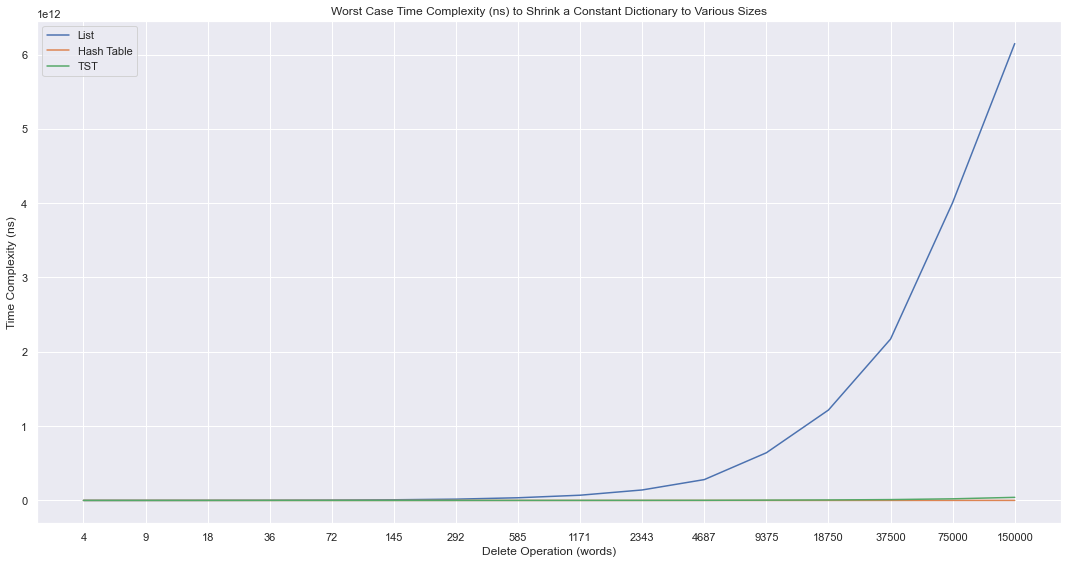

In [63]:
sns.set(style="darkgrid", rc={'figure.figsize':(15,8)})
plt.plot(dict_sizes_del1, list_avg_del1, label='List')
plt.plot(dict_sizes_del1, hash_avg_del1, label='Hash Table')
plt.plot(dict_sizes_del1, tst_avg_del1, label='TST')
plt.title('Worst Case Time Complexity (ns) to Shrink a Constant Dictionary to Various Sizes')
plt.xlabel('Delete Operation (words)')
plt.ylabel('Time Complexity (ns)')
plt.legend()
plt.tight_layout()
plt.show()